In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from numpy import linalg as la

In [4]:
import matplotlib.pyplot as plt
import matplotlib.cm as mcm
import matplotlib.colors as mcolors
import cartopy.crs as crs
import cartopy.feature as cfeature

In [5]:
#pip list

In [6]:
#Set linux path to the aq file and concatenate the path and string
filename = '../data/hourly_88101_PM25_2020.csv'
#Read in data with  pandas read_csv function. Only read in specific columns of this data set as given by
aq_dat= pd.read_csv(filename,sep=",",usecols=['State Code','County Code','Site Num','Latitude','Longitude','Date GMT','Time GMT','Sample Measurement'],parse_dates=[['Date GMT', 'Time GMT']])
display(aq_dat)

,Date GMT_Time GMT,State Code,County Code,Site Num,Latitude,Longitude,Sample Measurement
0,2020-01-01 06:00:00,1,73,23,33.553056,-86.815000,3.3
1,2020-01-01 07:00:00,1,73,23,33.553056,-86.815000,4.8
2,2020-01-01 08:00:00,1,73,23,33.553056,-86.815000,4.2
3,2020-01-01 09:00:00,1,73,23,33.553056,-86.815000,4.5
4,2020-01-01 10:00:00,1,73,23,33.553056,-86.815000,6.5
...,...,...,...,...,...,...,...
5732893,2021-01-01 03:00:00,80,2,14,32.633671,-115.504995,47.0
5732894,2021-01-01 04:00:00,80,2,14,32.633671,-115.504995,133.0
5732895,2021-01-01 05:00:00,80,2,14,32.633671,-115.504995,65.0
5732896,2021-01-01 06:00:00,80,2,14,32.633671,-115.504995,92.0


In [7]:
#let's simplify the data.
#1. create a new dataframe named aq_utah with data only in utah
#new_frame = original_frame[original_frame['appropriate column']==49]

#answer #1

aq_utah = aq_dat[aq_dat['State Code']==49]
#display(aq_utah)
#create a station ID using the County and Site columns
STN = aq_utah["County Code"].astype(str) + aq_utah["Site Num"].astype(str)
#print(STN)

#2a.add the STN column to the aq_utah dataframe

#answer #2a

aq_utah['STN'] = STN

#shorten the column names
aq_utah.rename(columns={"Date GMT_Time GMT": "Time","Sample Measurement":"PM2.5", \
                        "Latitude": "Lat","Longitude": "Lon"},inplace=True)

#2a-1. add in having Time as index
aq_utah.set_index('Time',inplace=True)

#remove unnecessary columns
aq_utah.drop(columns=["State Code","County Code","Site Num"],inplace=True)

#display the utah data
display(aq_utah)

#the first line of data should look like:
#	Time	Lat	Lon	PM2.5	STN
#5039391	2020-01-13 18:00:00	41.842649	-111.852199	0.6	57

#you will get warnings that can be ignored. The issue arises from using the
#same dataframe

/scratch/local/u0035056/6322378/ipykernel_1479436/3052260201.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aq_utah['STN'] = STN
/scratch/local/u0035056/6322378/ipykernel_1479436/3052260201.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aq_utah.rename(columns={"Date GMT_Time GMT": "Time","Sample Measurement":"PM2.5", \
/scratch/local/u0035056/6322378/ipykernel_1479436/3052260201.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

,Lat,Lon,PM2.5,STN
Time,,,,
2020-01-13 18:00:00,41.842649,-111.852199,0.6,57
2020-01-13 19:00:00,41.842649,-111.852199,0.5,57
2020-01-13 20:00:00,41.842649,-111.852199,0.6,57
2020-01-13 21:00:00,41.842649,-111.852199,1.0,57
2020-01-13 22:00:00,41.842649,-111.852199,0.8,57
...,...,...,...,...
2021-01-01 02:00:00,41.303614,-111.987871,20.1,571003
2021-01-01 03:00:00,41.303614,-111.987871,20.4,571003
2021-01-01 04:00:00,41.303614,-111.987871,22.5,571003


In [8]:
#output the location metadata for all Utah stations into the variable "sites"
sites = aq_utah.drop_duplicates(subset=['STN'])

#ugh the file doesn't have the station names, so let's add them

stn_names = ['Smithfield','Bountiful','Roosevelt','Enoch',\
        'Copperview','Hawthorne','Inland Port','Herriman',\
        'Rose Park','Murray','Erda','Vernal',\
         'Lindon','Spanish Fork','Hurricane','Harrisville']

#a change
#2b. define the indices of the dataframe sites to be the station names

sites.index = stn_names
#sort by STN values
sites.sort_values(by='STN',inplace=True)
sites.drop(columns=["PM2.5"],inplace=True)
display(sites)
#don't worry about any warning

/scratch/local/u0035056/6322378/ipykernel_1479436/2264225708.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sites.sort_values(by='STN',inplace=True)
/scratch/local/u0035056/6322378/ipykernel_1479436/2264225708.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sites.drop(columns=["PM2.5"],inplace=True)


,Lat,Lon,STN
Bountiful,40.902967,-111.884467,114
Roosevelt,40.294178,-110.009732,132
Enoch,37.747430,-113.055525,215
Copperview,40.598056,-111.894167,352005
Hawthorne,40.736389,-111.872222,353006
Inland Port,40.784220,-111.931000,353010
Herriman,40.496392,-112.036298,353013
Rose Park,40.777145,-111.945849,353015
Murray,40.662878,-111.901188,354002
Erda,40.600532,-112.353414,454


In [9]:
#simplify the precision to print  a numpy array
np.set_printoptions(precision=1)

#3.compute the distance between every pair of STNs

#radius of earth in km 
re = 6370

#3a. define the numpy constant for pi and assign pi180 = pi/180.

#Answer 3a

pi180 = np.pi/180.
print(pi180)

0.017453292519943295


In [10]:
#distance between any two longitudes: delta_x = re * cos(lat*pi/180)*delta_lon*pi/180
#distance between any two latitudes: delta_y = re * delta_lat * pi/180
#distance between any two points on a sphere:  
#delta_z = sqrt(delta_x*delta_x+delta_y*delta_y)

#3b. determine the number of stations using a numpy function
# on the dataframe index

#Answer 3b

no_stn = np.size(sites.index)
print(no_stn)              

16


In [11]:
#3c. create a numpy zeros array, dist, of size no_stn by no_stn

#Answer 3c

dist = np.zeros((no_stn,no_stn))
print(dist)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [12]:
#3d. loop over the integer values fs representing all STNs 
print(sites['Lat'][0])

40.902967


In [13]:
#Answer 3d
print(type(no_stn))
for fs in np.arange(0,no_stn):
    #    print(fs)
    
#3e. loop over the integer values ls for the range from fs to the last stn

    for ls in np.arange(fs,no_stn):
        #        print(fs,ls)
        #print(sites.Lat)
        delta_x = re * np.cos(sites.Lat[fs]*pi180)*(sites.Lon[fs]-sites.Lon[ls])*pi180
        #print(fs,ls,sites.Lat[fs],delta_x)
        delta_y = re * (sites.Lat[fs]-sites.Lat[ls]) * pi180
        delta_z =  np.sqrt(delta_x*delta_x+delta_y*delta_y)
       
        #3e. compute delta_x and delta_y and then compute
        
        
        #3f. assign the delta_z values into the dist array \
        # to obtain the following table for each fs,ls station pair
        
        #Answer 3f
        
        dist[ls,fs] = delta_z
        
        
        
    #print out the row of distances between station fs and all the others
    #the values to the left of fs were not computed and remain 0
    
#    print(fs,stn_names[fs],dist[fs,:])    

#print(dist)
#3g find the max and min nonzero distances between any pair of stations
#use the numpy function nonzero(a) 
#print out the answers
#the output needs to look like:
#Max dist 532.3 km; Min dist 1.5 km
max_dist = np.max(dist)
min_dist = np.min(dist[np.nonzero(dist)])
print(max_dist,min_dist)
#Answer 3g

<class 'int'>
534.21307361912 1.4768923115214845


In [14]:
#simplify using a function
def distance(lat1,lon1,lat2,lon2):
    re = 6370.
    pi180 = np.pi/180.
    delta_x = re * np.cos(lat1)*(lon1-lon2)*pi180
    delta_y = re * (lat1-lat2) * pi180
    return(np.sqrt(delta_x**2+delta_y**2))

dist = np.zeros((no_stn,no_stn))

for fs in np.arange(0,no_stn):
    for ls in np.arange(0,no_stn):
        dist[ls,fs] = distance(sites['Lat'][fs],sites['Lon'][fs],sites['Lat'][ls],sites['Lon'][ls])
print(dist)

[[  0.  190.5 374.2  33.9  18.6  14.2  47.9  15.6  26.8  60.8 245.1  64.6
   87.3 436.1 104.5  45.7]
 [218.8   0.  441.1 206.2 211.7 220.1 213.3 221.4 211.  255.4  50.1 166.4
  140.9 470.1 204.5 226.5]
 [374.1 404.8   0.  340.8 357.1 360.  323.7 358.6 347.9 326.1 471.  316.7
  290.7  67.6 461.  409.4]
 [ 33.9 182.1 342.2   0.   15.6  21.1  18.7  20.7   7.2  49.6 241.7  33.5
   55.  403.7 138.4  79. ]
 [ 18.6 183.6 357.3  15.6   0.    8.4  31.7   9.3   8.8  54.1 240.9  46.6
   69.1 419.  123.   64.1]
 [ 14.2 190.4 360.   21.1   8.4   0.   33.8   1.8  13.9  50.  247.6  53.6
   75.6 422.2 117.8  58. ]
 [ 48.2 193.8 325.9  19.1  32.3  34.1   0.   32.8  23.7  36.1 255.9  35.9
   51.1 388.6 150.1  89.9]
 [ 15.6 191.6 358.7  20.7   9.3   1.8  32.6   0.   13.6  48.2 249.   53.5
   75.2 421.  118.6  58.7]
 [ 26.8 184.3 348.6   7.2   8.8  13.9  23.3  13.6   0.   49.3 243.   40.2
   62.  410.3 131.2  71.8]
 [ 62.  225.2 326.6  49.6  55.3  51.1  35.1  49.3  50.    0.  289.1  68.8
   78.2 391.3 141

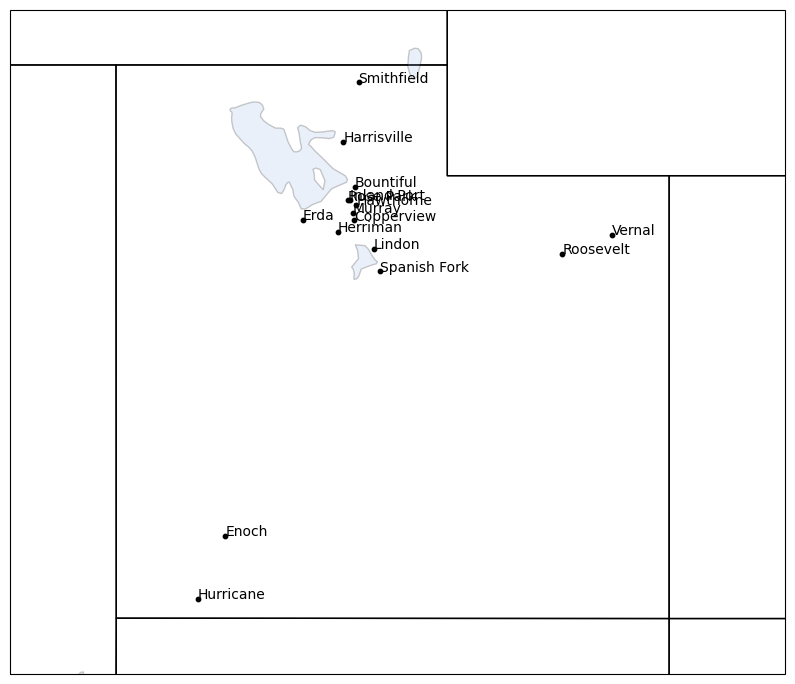

In [15]:
#plot locations in Utah
figure = plt.figure(figsize=(10,10))
ax = figure.add_subplot(1,1,1, projection=crs.PlateCarree())
ax.set_extent([-115,-108,36.5,42.5],crs=crs.PlateCarree())
ax.add_feature(cfeature.STATES.with_scale('50m'), edgecolor='k')
ax.add_feature(cfeature.LAKES.with_scale('50m'), edgecolor='k',alpha=0.2)
ax.scatter(sites['Lon'],sites['Lat'],marker='o',s=10,c='k')
ID = sites.index.values
for i, id in enumerate(ID): 
    ax.annotate(id, (sites['Lon'][i],sites['Lat'][i]))
plt.savefig('locations_utah.png')

In [23]:
#now take advantage of pandas to "pivot" to split up the data by NAME
#that puts every Time as a column, that is really ugly
aqu=aq_utah.pivot_table(values="PM2.5", index=["STN"],columns="Time")
aqu.index = sites.index
display(aqu)

Time,2020-01-01 07:00:00,2020-01-01 08:00:00,2020-01-01 09:00:00,2020-01-01 10:00:00,2020-01-01 11:00:00,2020-01-01 12:00:00,2020-01-01 13:00:00,2020-01-01 14:00:00,2020-01-01 15:00:00,2020-01-01 16:00:00,...,2020-12-31 21:00:00,2020-12-31 22:00:00,2020-12-31 23:00:00,2021-01-01 00:00:00,2021-01-01 01:00:00,2021-01-01 02:00:00,2021-01-01 03:00:00,2021-01-01 04:00:00,2021-01-01 05:00:00,2021-01-01 06:00:00
Bountiful,20.90,22.70,19.4,20.80,19.30,13.5,7.50,7.6,8.70,10.10,...,24.20,25.90,24.00,22.1,21.20,19.60,22.50,24.00,22.60,24.80
Roosevelt,16.80,18.50,19.3,18.00,16.80,18.3,16.80,19.8,19.70,18.40,...,5.80,5.30,5.50,5.4,6.75,6.15,6.55,8.25,9.50,11.35
Enoch,7.50,8.10,5.3,5.10,9.50,9.1,6.00,5.1,5.30,5.70,...,3.60,4.20,3.90,3.6,4.70,5.30,6.30,6.30,5.50,5.40
Copperview,10.50,11.10,12.4,10.80,10.90,13.2,11.20,5.6,10.70,6.30,...,19.00,17.70,17.10,17.0,15.20,18.90,20.30,19.30,18.00,19.20
Hawthorne,16.90,15.90,16.7,17.05,12.85,9.9,9.55,10.7,11.85,11.55,...,14.05,14.60,14.90,15.4,15.05,15.20,13.60,12.30,17.30,15.00
Inland Port,16.40,16.50,16.4,17.30,12.40,8.2,8.80,10.6,9.70,10.20,...,16.10,13.40,15.40,14.9,13.90,13.30,13.70,16.60,14.20,18.70
Herriman,8.15,7.25,7.4,5.65,3.55,3.0,3.15,4.9,5.20,3.75,...,12.05,19.75,14.40,9.5,14.95,13.20,10.75,13.30,14.15,8.10
Rose Park,5.40,5.60,5.9,6.30,4.80,3.7,3.70,4.5,4.20,3.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Murray,18.50,17.50,20.3,15.80,14.00,14.7,15.50,13.4,12.30,11.80,...,18.10,17.60,16.20,14.6,15.40,17.10,17.10,14.60,17.20,18.80
Erda,3.40,3.90,5.6,5.70,6.50,7.0,7.20,7.3,7.50,5.80,...,19.40,21.50,21.60,19.8,20.30,20.70,20.70,24.80,27.70,28.50


In [24]:
#4a now use the transpose function so that the times are rows and
#each column is a station 
#and display the data in this format
aqu = aqu.transpose()
aqu_columns = list(aqu.columns)
print(aqu_columns)
#Answer 4a

display(aqu)

['Bountiful', 'Roosevelt', 'Enoch', 'Copperview', 'Hawthorne', 'Inland Port', 'Herriman', 'Rose Park', 'Murray', 'Erda', 'Vernal', 'Lindon', 'Spanish Fork', 'Hurricane', 'Smithfield', 'Harrisville']


,Bountiful,Roosevelt,Enoch,Copperview,Hawthorne,Inland Port,Herriman,Rose Park,Murray,Erda,Vernal,Lindon,Spanish Fork,Hurricane,Smithfield,Harrisville
Time,,,,,,,,,,,,,,,,
2020-01-01 07:00:00,20.9,16.80,7.5,10.5,16.90,16.4,8.15,5.4,18.5,3.4,26.8,16.8,11.8,7.2,27.40,17.6
2020-01-01 08:00:00,22.7,18.50,8.1,11.1,15.90,16.5,7.25,5.6,17.5,3.9,24.3,16.7,9.9,7.2,28.60,23.3
2020-01-01 09:00:00,19.4,19.30,5.3,12.4,16.70,16.4,7.40,5.9,20.3,5.6,22.4,18.1,11.7,5.3,30.30,21.0
2020-01-01 10:00:00,20.8,18.00,5.1,10.8,17.05,17.3,5.65,6.3,15.8,5.7,22.8,13.8,8.0,3.9,26.40,18.8
2020-01-01 11:00:00,19.3,16.80,9.5,10.9,12.85,12.4,3.55,4.8,14.0,6.5,24.9,8.8,10.6,4.7,24.20,12.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-01 02:00:00,19.6,6.15,5.3,18.9,15.20,13.3,13.20,NaN,17.1,20.7,14.6,24.1,18.7,1.2,36.85,20.1
2021-01-01 03:00:00,22.5,6.55,6.3,20.3,13.60,13.7,10.75,NaN,17.1,20.7,12.0,25.0,17.6,1.6,38.45,20.4
2021-01-01 04:00:00,24.0,8.25,6.3,19.3,12.30,16.6,13.30,NaN,14.6,24.8,12.5,27.6,19.9,1.6,43.75,22.5


In [25]:
#4b to confirm, list and print the column names 

#Aanswer 4b


print(aqu_columns)

#4c to confirm, print the index values for the dataframe aqu
# the first two rows should look like
#DatetimeIndex(['2020-01-01 07:00:00', '2020-01-01 08:00:00',
#               '2020-01-01 09:00:00', '2020-01-01 10:00:00',

#Answer 4c


['Bountiful', 'Roosevelt', 'Enoch', 'Copperview', 'Hawthorne', 'Inland Port', 'Herriman', 'Rose Park', 'Murray', 'Erda', 'Vernal', 'Lindon', 'Spanish Fork', 'Hurricane', 'Smithfield', 'Harrisville']


In [26]:
#4d save the dataframe aqu to a csv file 
# with the name in your current directory
#use the function "to_csv"
#this is a very important step for research
#to be able to bypass having to do all of the
#preprocessing steps above

#Answer 4d

aqu.to_csv('aq_utah_2020.csv',index=True)

#4e save the dataframe "sites" to a csv file named sites.csv. 

sites.to_csv('sites.csv',index=True)
#Answer 4e


In [20]:
#4e As a final check, get some basic stats
#use the pandas describe function to obtain and display a variable "basic_vals"
#that includes the 1st, median, and 99th percentile along with other default parameters

#Answer 4f


display(basic_vals)

NameError: name 'basic_vals' is not defined